## 1. Crawling Twitter

In [1]:
import tweepy
import os
import pandas as pd

In [2]:
consumer_key = "X2YjWfUQYCDHwNYilnWeLBFrx" 
consumer_secret = "qjy8qJ9Tfaf9vRxZHh0GNiemwf15USCn4naARn6tXszMvD14Lv" 
access_token = "1147844322-dwcKtxvHhLy1ELJ3QCXPNYWOIDril7bHGuyzd5j"
access_token_secret = "QfdyyuRmbX4tIy4wxbJgv8JDfD6PDpoXkRyqhHaMlmj5q"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
Query = " utbk-filter:retweets"
Start_Date = "2021-12-20"
End_Date = "2022-04-19"

In [4]:
tweets = tweepy.Cursor(api.search_tweets,
              q=Query,
              lang="id",
              since= Start_Date,
              Until = End_Date).items(1000)

In [5]:
User_locs = [[tweet.user.screen_name,tweet.user.description,tweet.user.location,tweet.text,tweet.favorite_count,tweet.retweet_count,]for tweet in tweets]

Value = pd.DataFrame(data = User_locs,columns = ['User Name','Description_user','Location','Tweet','Likes','Retweet'])

Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter

In [6]:
Value

,User Name,Description_user,Location,Tweet,Likes,Retweet
0,marksooaddict,L-1485 \nNctzen,"Kalimantan Barat, Indonesia","tapi lebih ke ""malu"" untuk mengakui semuanya, ...",0,0
1,Trias0405,NIP FANS |\nPlaying Csgo but no skill |\n日本語を勉...,,"@dawonisme Sabar Keza, orang bilang TO susah d...",0,0
2,sambat4lyfeee,Akun sambatqu,,@sbmptnfess Waktu itukan lg nyari temen pas ut...,0,0
3,marksooaddict,L-1485 \nNctzen,"Kalimantan Barat, Indonesia","sksksk i'm not okay kalo ditanya soal kuliah, ...",0,0
4,fives_22,,"Banten, Indonesia","Kompleks bngt dah, udh deket utbk dahal...",0,0
...,...,...,...,...,...,...
995,innaaasvplce,ambis acc,,haii ada yang mau mutual buat utbk ga,0,0
996,sbmptnfess,"📌 MENFESS ACCOUNT FOR SHARING ABOUT SNMPTN, SB...",RULES 👉,PTN! emang di utbk ada soal mtk pake bhs Inggr...,14,0
997,_meanace,leave it all to Him,london ʕ♡^ᴥ^♡ʔ,tipe soal utbk yg paling gue benci: https://t....,0,0
998,Kurnia02012158,,,@pahamify Matematika Logaritma UTBK 2022\nhttp...,0,0


## 2. Pre Processing

In [7]:
import pandas as pd
import nltk
import re
import emoji
import numpy as np

In [8]:
pd.set_option('display.max_colwidth', 1200)

In [9]:
dataset = Value.drop(columns = ['User Name','Description_user','Location','Likes','Retweet'])
dataset.to_csv('Text_Practicum.csv',index = False)

In [10]:
Dataset = pd.read_csv("Text_Practicum.csv")
Dataset

,Tweet
0,"tapi lebih ke ""malu"" untuk mengakui semuanya, kliatan nya fine"" aja slama ini ditnya sm anak"" ""kau udh dftar utbk k… https://t.co/d2OWRMYC4g"
1,"@dawonisme Sabar Keza, orang bilang TO susah dripada utbk, tapi mari kita lihat ༎ຶ‿༎ຶ"
2,"@sbmptnfess Waktu itukan lg nyari temen pas utbk, aku gabung digrup tele smpe dapet grup wa jg, nah digrup wa tuh a… https://t.co/dNKxldOohA"
3,"sksksk i'm not okay kalo ditanya soal kuliah, apalagi skrng anak"" kelas pd mulai ngurus berkas buat utbk"
4,"Kompleks bngt dah, udh deket utbk dahal..."
...,...
995,haii ada yang mau mutual buat utbk ga
996,PTN! emang di utbk ada soal mtk pake bhs Inggris ya? Di subtes apa ya? Belajarnya gmna tuh 😭
997,tipe soal utbk yg paling gue benci: https://t.co/Z04uWID9v1
998,@pahamify Matematika Logaritma UTBK 2022\nhttps://t.co/KzU1QcW6Pw


**Case Folding and Remove Unnecessary Character**

In [11]:
def preprocessing(tweets):
    tweets = tweets.encode('ascii','ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)
    tweets = re.sub(r'[_(){}[]]+','',tweets)
    tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'_[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'-[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r':[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'\d+','',tweets)
    tweets = re.sub(r'@+','',tweets)
    tweets = re.sub(r':+','',tweets)
    tweets = re.sub(r',+','',tweets)
    tweets = re.sub(r'_+','',tweets)
    tweets = tweets.lower()
    allemot = [str for str in tweets]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split()if not any (y in str for str in listemot)])
    return tweets

Dataset['Tweet'] = Dataset['Tweet'].apply(preprocessing)
Dataset

,Tweet
0,"tapi lebih ke ""malu"" untuk mengakui semuanya kliatan nya fine"" aja slama ini ditnya sm anak"" ""kau udh dftar utbk k"
1,sabar keza orang bilang to susah dripada utbk tapi mari kita lihat
2,waktu itukan lg nyari temen pas utbk aku gabung digrup tele smpe dapet grup wa jg nah digrup wa tuh a
3,"sksksk i'm not okay kalo ditanya soal kuliah apalagi skrng anak"" kelas pd mulai ngurus berkas buat utbk"
4,kompleks bngt dah udh deket utbk dahal...
...,...
995,haii ada yang mau mutual buat utbk ga
996,ptn! emang di utbk ada soal mtk pake bhs inggris ya? di subtes apa ya? belajarnya gmna tuh
997,tipe soal utbk yg paling gue benci
998,matematika logaritma utbk


In [12]:
#!pip install googletrans==3.1.0a0

In [13]:
import googletrans
from googletrans import *

translator = googletrans.Translator()

Dataset['Tweet'] = Dataset['Tweet'].astype(str) 
Dataset['Tweet'] = Dataset['Tweet'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
Dataset

,Tweet
0,"but it's more ""embarrassed"" to admit everything looks fine"" all this time it's been with the children"" ""you have registered for k"
1,be patient with people saying tod is harder than utbk but let's see
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group"
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB"
4,very complex already close to dahal...
...,...
995,"Hey, anyone want to be mutual for someone?"
996,"ptn! Is there a question on utbk for using English, right? in what subtest? how do you learn"
997,the type of question for tbk that i hate the most
998,logarithmic math utbk


In [14]:
Dataset.to_csv("Text_Translate.csv",index= False)

**Remove Character**

In [15]:
Data = pd.read_csv('Text_Translate.csv')
Data

,Tweet
0,"but it's more ""embarrassed"" to admit everything looks fine"" all this time it's been with the children"" ""you have registered for k"
1,be patient with people saying tod is harder than utbk but let's see
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group"
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB"
4,very complex already close to dahal...
...,...
995,"Hey, anyone want to be mutual for someone?"
996,"ptn! Is there a question on utbk for using English, right? in what subtest? how do you learn"
997,the type of question for tbk that i hate the most
998,logarithmic math utbk


In [16]:
def preprocessing(tweets):
   
    tweets = re.sub(r'[!”#$%&’()*+,-./:;<=>?@[\]^''{|}~]', '', tweets) 
    tweets = tweets.lower() 
    
    return tweets 

Data['Tweet'] = Data['Tweet'].apply(preprocessing)
Data

,Tweet
0,"but it's more ""embarrassed"" to admit everything looks fine"" all this time it's been with the children"" ""you have registered for k"
1,be patient with people saying tod is harder than utbk but let's see
2,at that time i was looking for friends just right for me to join the tele group until i got the wa group so in the wa group
3,sksksk i'm not okay if you ask me about college especially now that the class is starting to take care of the files for utb
4,very complex already close to dahal
...,...
995,hey anyone want to be mutual for someone
996,ptn is there a question on utbk for using english right in what subtest how do you learn
997,the type of question for tbk that i hate the most
998,logarithmic math utbk


**Stopword Removal**

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\L E N O V
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\L E N O V
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
print (set(stopwords.words('english')))

{'those', 'it', 'just', 'she', 't', 'because', 'll', 'did', 'once', 'when', 'o', 'by', 'am', 'his', 'mightn', 'who', 'not', 'mustn', 'with', 'you', 'from', 'are', 'into', 'didn', 'than', 'have', 'but', "you're", 'itself', 'herself', 'how', 'does', 'some', 'same', 's', 've', 'then', 'such', 'y', "she's", 'be', 'above', 'shan', 'doesn', 'as', 'an', "it's", "mustn't", 'if', "wouldn't", 're', 'isn', 'do', "won't", 'this', 'he', 'wasn', 'having', "isn't", "wasn't", 'will', 'hadn', 'was', 'before', 'here', 'further', 'more', 'him', 'them', 'been', 'own', 'against', 'out', 'the', 'what', 'himself', 'is', 'of', 'her', 'aren', 'hasn', "shouldn't", 'too', "aren't", "don't", 'at', 'any', 'few', 'other', 'and', 'both', 'wouldn', 'up', 'ain', "needn't", 'weren', 'about', 'yourself', 'were', 'don', 'should', 'themselves', "didn't", 'again', 'no', 'which', 'doing', 'm', "hasn't", "doesn't", "hadn't", 'myself', 'on', 'their', 'now', 'below', 'won', 'a', 'hers', 'being', "mightn't", 'ourselves', 'after

In [19]:
add = pd.DataFrame(Data['Tweet'])
Data['Tweet']= add.replace(to_replace =["it's"],  
                            value ="", regex= True) 
Data

,Tweet
0,"but more ""embarrassed"" to admit everything looks fine"" all this time been with the children"" ""you have registered for k"
1,be patient with people saying tod is harder than utbk but let's see
2,at that time i was looking for friends just right for me to join the tele group until i got the wa group so in the wa group
3,sksksk i'm not okay if you ask me about college especially now that the class is starting to take care of the files for utb
4,very complex already close to dahal
...,...
995,hey anyone want to be mutual for someone
996,ptn is there a question on utbk for using english right in what subtest how do you learn
997,the type of question for tbk that i hate the most
998,logarithmic math utbk


In [20]:
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))

mystoplist_result = []
for index,row in Data.iterrows():
    word_token = nltk.word_tokenize(row['Tweet'])
    word_token = [word for word in word_token if not word in stopword]
    mystoplist_result.append(" ".join(word_token))

Data['Tweet'] = mystoplist_result
Data

,Tweet
0,`` embarrassed '' admit everything looks fine '' time children '' `` registered k
1,patient people saying tod harder utbk let 's see
2,time looking friends right join tele group got wa group wa group
3,sksksk 'm okay ask college especially class starting take care files utb
4,complex already close dahal
...,...
995,hey anyone want mutual someone
996,ptn question utbk using english right subtest learn
997,type question tbk hate
998,logarithmic math utbk


**Stemming**

In [21]:
from nltk.stem import PorterStemmer

Stem = nltk.PorterStemmer()

def porterstemmer(Tweets):
  text = ' '.join(Stem.stem(word) for word in Tweets.split() if word in Tweets)
  return Tweets
  
Data['Tweet']= Data['Tweet'].apply(porterstemmer)
Data

,Tweet
0,`` embarrassed '' admit everything looks fine '' time children '' `` registered k
1,patient people saying tod harder utbk let 's see
2,time looking friends right join tele group got wa group wa group
3,sksksk 'm okay ask college especially class starting take care files utb
4,complex already close dahal
...,...
995,hey anyone want mutual someone
996,ptn question utbk using english right subtest learn
997,type question tbk hate
998,logarithmic math utbk


**Lemmatization**

In [22]:
from nltk.stem import WordNetLemmatizer

wn= nltk.WordNetLemmatizer()

def lemmatization(Tweets):
    text = ' '.join(wn.lemmatize(word) for word in Tweets.split() if word in Tweets)
    return Tweets


Data['Tweet'] = Data['Tweet'].apply(lemmatization)
Data

,Tweet
0,`` embarrassed '' admit everything looks fine '' time children '' `` registered k
1,patient people saying tod harder utbk let 's see
2,time looking friends right join tele group got wa group wa group
3,sksksk 'm okay ask college especially class starting take care files utb
4,complex already close dahal
...,...
995,hey anyone want mutual someone
996,ptn question utbk using english right subtest learn
997,type question tbk hate
998,logarithmic math utbk


In [23]:
Data.to_csv('Final_Preprocess.csv',index = False)

In [24]:
Data_set = pd.read_csv("Final_Preprocess.csv")
Data_set

,Tweet
0,`` embarrassed '' admit everything looks fine '' time children '' `` registered k
1,patient people saying tod harder utbk let 's see
2,time looking friends right join tele group got wa group wa group
3,sksksk 'm okay ask college especially class starting take care files utb
4,complex already close dahal
...,...
995,hey anyone want mutual someone
996,ptn question utbk using english right subtest learn
997,type question tbk hate
998,logarithmic math utbk


In [25]:
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   998 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [26]:
Data_set['Tweet'] = Data_set['Tweet'].replace(np.nan, '')

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

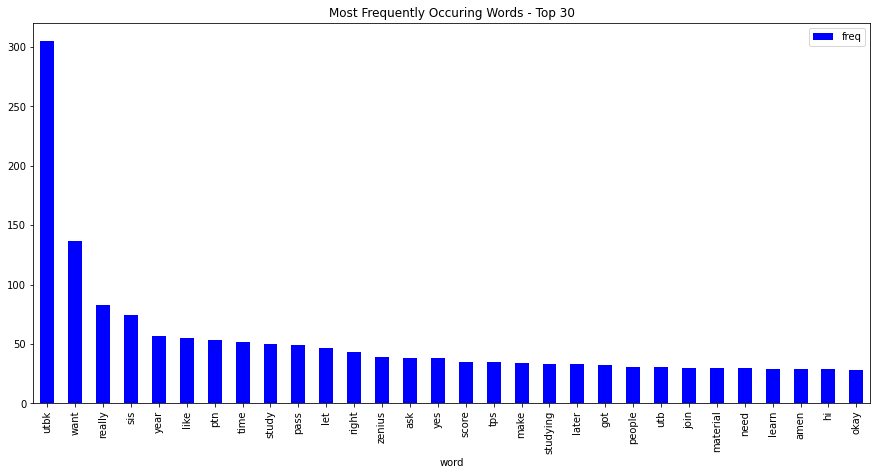

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(Data_set.Tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

## 3.Term Frequency Inverse Document Frequency

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
counter = CountVectorizer()

X = counter.fit_transform(Data_set['Tweet'])

vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())

vector

C:\Users\L E N O V O\anaconda3\envs\Data Mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaamiinnn,aaarrghhh,aab,aamiin,abi,abiez,able,ac,...,yr,yt,yu,yuki,yutebeka,yuuu,yyy,zen,zenius,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer()

Y = vectorizer.fit_transform(X)

df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())

df_tfidf

C:\Users\L E N O V O\anaconda3\envs\Data Mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaamiinnn,aaarrghhh,aab,aamiin,abi,abiez,able,ac,...,yr,yt,yu,yuki,yutebeka,yuuu,yyy,zen,zenius,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_tfidf.to_csv("TF_IDF.csv",index = False)

## 4. Sentiment Using Text Blob

In [32]:
!pip install TextBlob

In [33]:
Data_sentimen = pd.read_csv('Text_Translate.csv')
Data_sentimen

,Tweet
0,"but it's more ""embarrassed"" to admit everything looks fine"" all this time it's been with the children"" ""you have registered for k"
1,be patient with people saying tod is harder than utbk but let's see
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group"
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB"
4,very complex already close to dahal...
...,...
995,"Hey, anyone want to be mutual for someone?"
996,"ptn! Is there a question on utbk for using English, right? in what subtest? how do you learn"
997,the type of question for tbk that i hate the most
998,logarithmic math utbk


In [34]:
from textblob import TextBlob

Data_sentimen['polarity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
Data_sentimen['subjectivity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

Data_sentimen

,Tweet,polarity,subjectivity
0,"but it's more ""embarrassed"" to admit everything looks fine"" all this time it's been with the children"" ""you have registered for k",0.458333,0.500000
1,be patient with people saying tod is harder than utbk but let's see,-0.100000,0.000000
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group",0.285714,0.535714
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB",-0.083333,0.533333
4,very complex already close to dahal...,-0.390000,0.520000
...,...,...,...
995,"Hey, anyone want to be mutual for someone?",0.000000,0.000000
996,"ptn! Is there a question on utbk for using English, right? in what subtest? how do you learn",0.142857,0.267857
997,the type of question for tbk that i hate the most,-0.150000,0.700000
998,logarithmic math utbk,0.000000,0.000000


In [35]:
Data_sentimen.loc[Data_sentimen['subjectivity']>= 0.5, 'Jenis'] = "Opini"
Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5, 'Jenis'] = "Fakta"

datasentiment = pd.DataFrame(Data_sentimen['Jenis'])
hasil_positif = datasentiment [datasentiment ['Jenis'] =="Opini"]
hasil_netral = datasentiment [datasentiment ['Jenis'] =="Fakta"]

hasil_positif = len (hasil_positif)
hasil_netral = len (hasil_netral)
df = pd.DataFrame({"Jenis": ['Opini','Fakta'],"Total Jenis": [hasil_positif,hasil_netral]})
df

,Jenis,Total Jenis
0,Opini,308
1,Fakta,692


In [36]:
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5].index, inplace=True)
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['polarity']==0.0].index, inplace=True)
Data_sentimen

,Tweet,polarity,subjectivity,Jenis
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group",0.285714,0.535714,Opini
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB",-0.083333,0.533333,Opini
4,very complex already close to dahal...,-0.390000,0.520000,Opini
7,h for good with you,0.700000,0.600000,Opini
8,"I just want to take my sister to school... if I don't catch up now, I won't be able to send her to school again.",0.500000,0.625000,Opini
...,...,...,...,...
979,how hard is it bro for that? And in what semester should I start studying?,-0.291667,0.541667,Opini
980,"[secret value for the economy] I didn't think I would get something like this, to be honest, I've never been the one to get it",0.100000,0.800000,Opini
981,my year as a supervisor is not fierce. there was a supervisor at the time. front behind. well what d,-0.400000,0.700000,Opini
985,there are no questions for easy,0.433333,0.833333,Opini


In [37]:

Data_sentimen.loc[Data_sentimen['polarity']> 0.0, 'sentiment'] = "Positif"
Data_sentimen.loc[Data_sentimen['polarity']< 0.0, 'sentiment'] = "Negatif"

Data_sentimen = Data_sentimen[['Tweet', 'polarity','sentiment','subjectivity','Jenis']]
Data_sentimen

,Tweet,polarity,sentiment,subjectivity,Jenis
2,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group",0.285714,Positif,0.535714,Opini
3,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB",-0.083333,Negatif,0.533333,Opini
4,very complex already close to dahal...,-0.390000,Negatif,0.520000,Opini
7,h for good with you,0.700000,Positif,0.600000,Opini
8,"I just want to take my sister to school... if I don't catch up now, I won't be able to send her to school again.",0.500000,Positif,0.625000,Opini
...,...,...,...,...,...
979,how hard is it bro for that? And in what semester should I start studying?,-0.291667,Negatif,0.541667,Opini
980,"[secret value for the economy] I didn't think I would get something like this, to be honest, I've never been the one to get it",0.100000,Positif,0.800000,Opini
981,my year as a supervisor is not fierce. there was a supervisor at the time. front behind. well what d,-0.400000,Negatif,0.700000,Opini
985,there are no questions for easy,0.433333,Positif,0.833333,Opini


In [38]:
hasil_positif = Data_sentimen[Data_sentimen['sentiment'] =="Positif"]
hasil_negatif = Data_sentimen[Data_sentimen['sentiment'] =="Negatif"]

hasil_positif = len (hasil_positif)
hasil_negatif = len (hasil_negatif)

per_hasil_positif = (hasil_positif/(hasil_positif+hasil_negatif))*100
per_hasil_negatif = (hasil_negatif/(hasil_positif+hasil_negatif))*100

df = pd.DataFrame({"Nilai": ['Positif','Negatif'],"Total Sentiment": [hasil_positif,hasil_negatif],"Persentase": [per_hasil_positif,per_hasil_negatif]})
df


,Nilai,Total Sentiment,Persentase
0,Positif,168,59.15493
1,Negatif,116,40.84507


In [39]:
Data_sentimen.to_csv("Data_sentimen.csv",index = False)

### Visualisasi

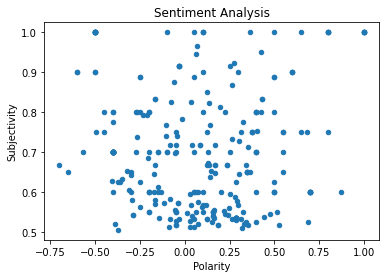

In [40]:
Data_sentimen.plot.scatter(x='polarity', y='subjectivity')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

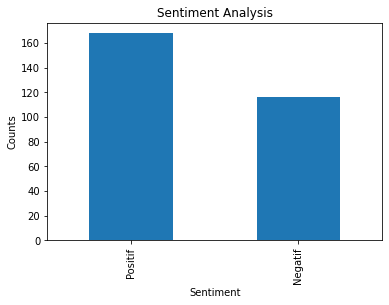

In [41]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Data_sentimen['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud

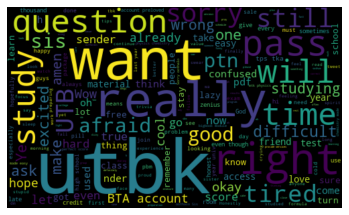

In [44]:
allWords = ' '.join([twts for twts in Data_sentimen['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Undersampling

In [45]:
#pip install imblearn

In [46]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
print(df.value_counts())

Nilai    Total Sentiment  Persentase
Negatif  116              40.84507      1
Positif  168              59.15493      1
dtype: int64


In [48]:
Label = pd.read_csv('Data_sentimen.csv')
Label

,Tweet,polarity,sentiment,subjectivity,Jenis
0,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group",0.285714,Positif,0.535714,Opini
1,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB",-0.083333,Negatif,0.533333,Opini
2,very complex already close to dahal...,-0.390000,Negatif,0.520000,Opini
3,h for good with you,0.700000,Positif,0.600000,Opini
4,"I just want to take my sister to school... if I don't catch up now, I won't be able to send her to school again.",0.500000,Positif,0.625000,Opini
...,...,...,...,...,...
279,how hard is it bro for that? And in what semester should I start studying?,-0.291667,Negatif,0.541667,Opini
280,"[secret value for the economy] I didn't think I would get something like this, to be honest, I've never been the one to get it",0.100000,Positif,0.800000,Opini
281,my year as a supervisor is not fierce. there was a supervisor at the time. front behind. well what d,-0.400000,Negatif,0.700000,Opini
282,there are no questions for easy,0.433333,Positif,0.833333,Opini


In [49]:
Label.loc[Label['sentiment']=="Positif",'label_sen']= "1"
Label.loc[Label['sentiment']=="Negatif",'label_sen']= "-1"
label_num = pd.DataFrame(Label['label_sen'])
label_num

,label_sen
0,1
1,-1
2,-1
3,1
4,1
...,...
279,-1
280,1
281,-1
282,1


In [50]:
X = Label.drop(columns = ['label_sen'])
Y = Label.drop(columns = X.columns)

In [51]:
from collections import Counter
Counter(Y.label_sen)

Counter({'1': 168, '-1': 116})

In [52]:
Undersampling = RandomUnderSampler(random_state=42, replacement=True)
x_under, y_under = Undersampling.fit_resample(X, Y.label_sen)

print('original dataset shape', Counter(Y.label_sen))
print('resample dataset shape', Counter(y_under))

original dataset shape Counter({'1': 168, '-1': 116})
resample dataset shape Counter({'-1': 116, '1': 116})


## 5. K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
Label = pd.read_csv('Data_sentimen.csv')
Label

,Tweet,polarity,sentiment,subjectivity,Jenis
0,"At that time, I was looking for friends, just right for me to join the tele group until I got the wa group, so in the wa group",0.285714,Positif,0.535714,Opini
1,"sksksk, I'm not okay if you ask me about college, especially now that the class is starting to take care of the files for UTB",-0.083333,Negatif,0.533333,Opini
2,very complex already close to dahal...,-0.390000,Negatif,0.520000,Opini
3,h for good with you,0.700000,Positif,0.600000,Opini
4,"I just want to take my sister to school... if I don't catch up now, I won't be able to send her to school again.",0.500000,Positif,0.625000,Opini
...,...,...,...,...,...
279,how hard is it bro for that? And in what semester should I start studying?,-0.291667,Negatif,0.541667,Opini
280,"[secret value for the economy] I didn't think I would get something like this, to be honest, I've never been the one to get it",0.100000,Positif,0.800000,Opini
281,my year as a supervisor is not fierce. there was a supervisor at the time. front behind. well what d,-0.400000,Negatif,0.700000,Opini
282,there are no questions for easy,0.433333,Positif,0.833333,Opini


In [61]:
Label.loc[Label['sentiment']=="Positif",'label_sen']= "1"
Label.loc[Label['sentiment']=="Negatif",'label_sen']= "-1"
label_num = pd.DataFrame(Label['label_sen'])
label_num

,label_sen
0,1
1,-1
2,-1
3,1
4,1
...,...
279,-1
280,1
281,-1
282,1


In [62]:
counter = CountVectorizer()
X = counter.fit_transform(Label['Tweet'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())

vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())

df_tfidf

,aaarrghhh,abiez,able,about,ac,accept,access,accompanied,accompany,accompanying,...,yet,you,your,yourself,yr,yuki,yuuu,yyy,zen,zenius
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.189327,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.119222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.262558,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, Label['label_sen'], test_size=0.33, random_state=0)

In [64]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (190, 1118)
X_test_shape :  (94, 1118)
y_train_shape :  (190,)
y_test_shape :  (94,)


In [65]:
#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [66]:

  for k in [1,3,5,7,10]:

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)
    print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
    print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
    print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
    print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))



Confusion Matrix for k = 1 is:

[[24 15]
 [23 32]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

          -1       0.51      0.62      0.56        39
           1       0.68      0.58      0.63        55

    accuracy                           0.60        94
   macro avg       0.60      0.60      0.59        94
weighted avg       0.61      0.60      0.60        94

Accuracy Score for k = 1 is: 60.0%
Macroaveraged Recall for k = 1 is: 60.0%
Macroaveraged Precision for k = 1 is: 60.0%
Macroaveraged F1-score for k = 1 is: 59.0%


Confusion Matrix for k = 3 is:

[[25 14]
 [23 32]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

          -1       0.52      0.64      0.57        39
           1       0.70      0.58      0.63        55

    accuracy                           0.61        94
   macro avg       0.61      0.61      0.60        94
weighted avg       0.62      0.61      0.61        94

A

## PLOTTING

<function matplotlib.pyplot.show(close=None, block=None)>

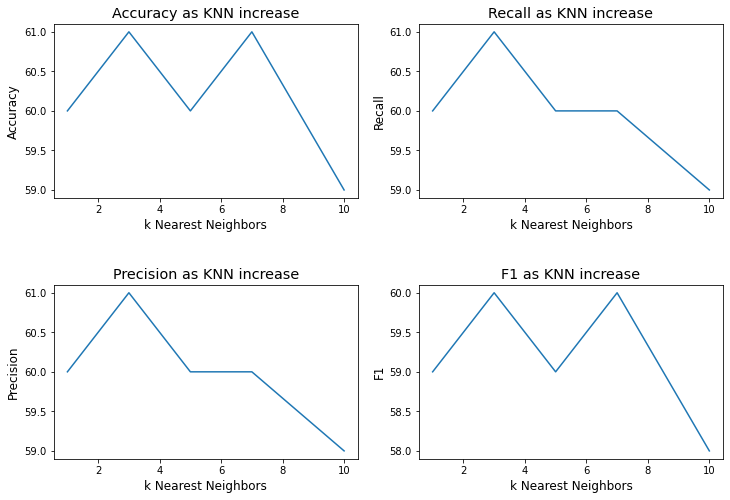

In [67]:
k_ls = [1,3,5,7,10] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show